In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

In [11]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import XResult
import ast
import math
from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format

In [3]:
from evaluate import plot_learning_curve, plot_accuracy_curve, load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_tsne, plot_multiple_grad_cam, plot_precision_recall

In [4]:
from data_gen import data
from run import characterize_data
from config import config

In [12]:
UUID = "7a0c5b7e-b2b7-4fd2-b251-32dc410614f5"

#t1: 4e4c0355-9643-4e22-80ba-78dd371c8900
#t1_t: 7b6d44a6-5439-47d5-a2b9-bf62193c0c2e
#t1_post: 2bcb25f3-b326-4f5b-ae3f-41eb90ae36ef
#t1_post_t: e50a3e1e-d292-4eb8-b152-a9a97238b5cb
#t2: 8c10b503-add4-48a0-92e1-49b156b9fb28
#t2_t: 5b548ac7-508c-41b9-8626-c8b8367e71c9

SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [9]:
SELECTIONS = eval(SELECTIONS)

# Learning Curve

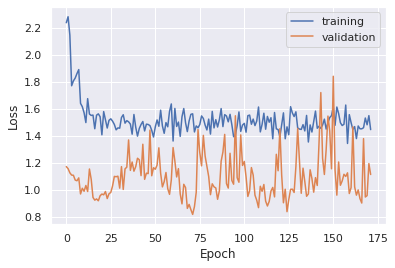

In [14]:
result = XResult.query.filter(XResult.run_id == UUID).first()
fig = plot_learning_curve(result)
fig.savefig("figures/learning_curves/{}-learning_curve.svg".format(UUID))

# Accuracy Trend

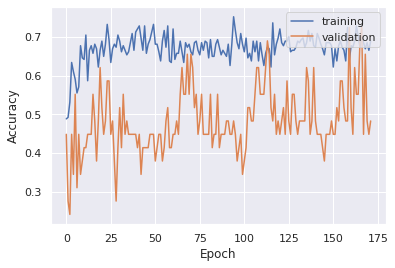

In [15]:
result = XResult.query.filter(XResult.run_id == UUID).first()
fig = plot_accuracy_curve(result)
fig.savefig("figures/accuracy/{}-accuracy.svg".format(UUID))

In [8]:
print("input form:", result.input_form)

input form: t1c-features


In [28]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [33]:
train, validation, test = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  1%|▏         | 3/240 [00:01<02:10,  1.81it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-132, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-132-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-132-t1c-imagingVolume.nrrd'


######################################################

  2%|▎         | 6/240 [00:02<01:37,  2.40it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   0.000
Name: china019, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china019-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china019-t1c-imagingVolume.nrrd'


######################################################

  3%|▎         | 8/240 [00:03<01:21,  2.83it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-040, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-040-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-040-t1c-imagingVolume.nrrd'



  5%|▌         | 12/240 [00:04<01:00,  3.74it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-044, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-044-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-044-t1c-imagingVolume.nrrd'



  5%|▌         | 13/240 [00:04<01:03,  3.55it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-036, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-036-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-036-t1c-imagingVolume.nrrd'



  6%|▌         | 14/240 [00:04<01:01,  3.70it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-14, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-14-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-14-t1c-imagingVolume.nrrd'



  8%|▊         | 18/240 [00:05<00:54,  4.08it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-99, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-99-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-99-t1c-imagingVolume.nrrd'



  8%|▊         | 20/240 [00:06<01:04,  3.41it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-062, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-062-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-062-t1c-imagingVolume.nrrd'



  9%|▉         | 21/240 [00:06<01:02,  3.51it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-71, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-71-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-71-t1c-imagingVolume.nrrd'



 10%|█         | 24/240 [00:09<01:37,  2.21it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-57, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-57-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-57-t1c-imagingVolume.nrrd'



 11%|█▏        | 27/240 [00:09<01:08,  3.12it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-142, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-142-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-142-t1c-imagingVolume.nrrd'



 12%|█▏        | 28/240 [00:10<01:19,  2.68it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-028, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-028-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-028-t1c-imagingVolume.nrrd'



 12%|█▏        | 29/240 [00:10<01:17,  2.72it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-017, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-017-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-017-t1c-imagingVolume.nrrd'



 13%|█▎        | 32/240 [00:12<01:29,  2.34it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-15, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-15-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-15-t1c-imagingVolume.nrrd'



 14%|█▍        | 33/240 [00:12<01:18,  2.63it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-77, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-77-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-77-t1c-imagingVolume.nrrd'



 16%|█▌        | 38/240 [00:14<01:04,  3.15it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-119, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-119-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-119-t1c-imagingVolume.nrrd'



 16%|█▋        | 39/240 [00:15<01:43,  1.94it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-007, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-007-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-007-t1c-imagingVolume.nrrd'



 18%|█▊        | 42/240 [00:15<01:11,  2.78it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china067, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china067-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china067-t1c-imagingVolume.nrrd'


######################################################

 18%|█▊        | 44/240 [00:16<01:10,  2.78it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-40, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-40-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-40-t1c-imagingVolume.nrrd'



 20%|██        | 49/240 [00:17<00:41,  4.65it/s]


################################################################################
Exception occurred for: sort          -
volume    0.606
outcome   0.000
Name: china133, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china133-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china133-t1c-imagingVolume.nrrd'


######################################################

 22%|██▏       | 52/240 [00:19<01:24,  2.23it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china091, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china091-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china091-t1c-imagingVolume.nrrd'


######################################################

 23%|██▎       | 56/240 [00:20<00:50,  3.68it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-43, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-43-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-43-t1c-imagingVolume.nrrd'


#########################################################

 25%|██▌       | 60/240 [00:22<01:30,  1.98it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-78, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-78-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-78-t1c-imagingVolume.nrrd'



 26%|██▌       | 62/240 [00:23<01:01,  2.88it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-64, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-64-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-64-t1c-imagingVolume.nrrd'


#########################################################

 27%|██▋       | 64/240 [00:23<00:43,  4.01it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china049, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china049-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china049-t1c-imagingVolume.nrrd'



 27%|██▋       | 65/240 [00:23<00:37,  4.61it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china099, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china099-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china099-t1c-imagingVolume.nrrd'


######################################################

 28%|██▊       | 67/240 [00:24<00:34,  5.06it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-62, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-62-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-62-t1c-imagingVolume.nrrd'



 29%|██▉       | 70/240 [00:25<00:55,  3.05it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china011, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china011-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china011-t1-imagingVolume.nrrd'



 31%|███       | 74/240 [00:26<00:50,  3.27it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-135, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-135-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-135-t1c-imagingVolume.nrrd'



 33%|███▎      | 79/240 [00:27<00:43,  3.73it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china030, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china030-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china030-t1c-imagingVolume.nrrd'


######################################################

 33%|███▎      | 80/240 [00:27<00:41,  3.85it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china072, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china072-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china072-t1c-imagingVolume.nrrd'


######################################################

 34%|███▍      | 82/240 [00:27<00:35,  4.42it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   0.000
Name: chop-59, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-59-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-59-t1c-imagingVolume.nrrd'



 38%|███▊      | 90/240 [00:30<00:51,  2.91it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-38, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-38-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-38-t1c-imagingVolume.nrrd'



 42%|████▏     | 100/240 [00:36<01:30,  1.55it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-042, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-042-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-042-t1c-imagingVolume.nrrd'



 42%|████▎     | 102/240 [00:36<01:08,  2.00it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-35, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-35-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-35-t1c-imagingVolume.nrrd'



 45%|████▌     | 108/240 [00:40<01:15,  1.75it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-104, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-104-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-104-t1c-imagingVolume.nrrd'



 48%|████▊     | 114/240 [00:47<01:14,  1.70it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-083, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-083-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-083-t1c-imagingVolume.nrrd'



 48%|████▊     | 116/240 [00:48<01:08,  1.80it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-17, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-17-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-17-t1c-imagingVolume.nrrd'



 49%|████▉     | 117/240 [00:48<00:59,  2.07it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-56, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-56-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-56-t1c-imagingVolume.nrrd'



 50%|████▉     | 119/240 [00:49<00:46,  2.58it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-25, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-25-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-25-t1c-imagingVolume.nrrd'



 50%|█████     | 120/240 [00:49<00:46,  2.56it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-124, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-124-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-124-t1c-imagingVolume.nrrd'



 50%|█████     | 121/240 [00:50<00:45,  2.61it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-88, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-88-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-88-t1c-imagingVolume.nrrd'



 51%|█████▏    | 123/240 [00:50<00:35,  3.27it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-30, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-30-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-30-t1c-imagingVolume.nrrd'


#########################################################

 52%|█████▎    | 126/240 [00:51<00:31,  3.57it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china048, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china048-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china048-t1-imagingVolume.nrrd'



 57%|█████▋    | 136/240 [00:54<00:28,  3.68it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china147, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china147-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china147-t1c-imagingVolume.nrrd'


######################################################

 57%|█████▊    | 138/240 [00:54<00:22,  4.63it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-004, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-004-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-004-t1c-imagingVolume.nrrd'



 59%|█████▉    | 142/240 [00:55<00:21,  4.61it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china153, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china153-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china153-t1c-imagingVolume.nrrd'



 60%|██████    | 145/240 [00:56<00:20,  4.66it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: chop-133, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-133-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-133-t1c-imagingVolume.nrrd'



 61%|██████    | 146/240 [00:56<00:19,  4.84it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china035, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china035-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china035-t1c-imagingVolume.nrrd'



 64%|██████▍   | 153/240 [00:58<00:23,  3.67it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-010, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-010-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-010-t1-imagingVolume.nrrd'


############################################################

 72%|███████▎  | 174/240 [01:04<00:19,  3.39it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-018, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-018-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-018-t1c-imagingVolume.nrrd'



 78%|███████▊  | 187/240 [01:15<00:48,  1.10it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china152, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china152-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china152-t1c-imagingVolume.nrrd'



 80%|████████  | 193/240 [01:17<00:15,  2.94it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-082, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-082-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-082-t1c-imagingVolume.nrrd'



 81%|████████  | 194/240 [01:17<00:16,  2.81it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: penn-049, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-049-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-049-t1c-imagingVolume.nrrd'



 81%|████████▏ | 195/240 [01:18<00:17,  2.51it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china024, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china024-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china024-t1-imagingVolume.nrrd'


############################################################

 85%|████████▌ | 204/240 [01:19<00:07,  4.93it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-003, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-003-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-003-t1-imagingVolume.nrrd'


############################################################

 86%|████████▌ | 206/240 [01:21<00:15,  2.25it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china041, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china041-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china041-t1c-imagingVolume.nrrd'



 87%|████████▋ | 208/240 [01:21<00:10,  2.97it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: chop-107, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-107-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-107-t1c-imagingVolume.nrrd'



 87%|████████▋ | 209/240 [01:22<00:09,  3.12it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china111, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china111-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china111-t1-imagingVolume.nrrd'



 89%|████████▉ | 214/240 [01:23<00:06,  4.12it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china046, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china046-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china046-t1c-imagingVolume.nrrd'



 91%|█████████▏| 219/240 [01:25<00:07,  2.93it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china090, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china090-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china090-t1c-imagingVolume.nrrd'


######################################################

 92%|█████████▏| 221/240 [01:25<00:05,  3.55it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-061, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-061-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-061-t1c-imagingVolume.nrrd'



 94%|█████████▍| 225/240 [01:27<00:07,  2.00it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china038, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china038-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china038-t1c-imagingVolume.nrrd'



 95%|█████████▍| 227/240 [01:28<00:05,  2.44it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-089, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-089-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-089-t1c-imagingVolume.nrrd'



 95%|█████████▌| 229/240 [01:32<00:10,  1.06it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: chop-50, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-50-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-50-t1-imagingVolume.nrrd'



 96%|█████████▋| 231/240 [01:32<00:06,  1.44it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china088, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china088-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china088-t1c-imagingVolume.nrrd'



 97%|█████████▋| 232/240 [01:33<00:04,  1.80it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china002, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china002-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china002-t1c-imagingVolume.nrrd'



 98%|█████████▊| 236/240 [01:34<00:01,  2.82it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china058, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china058-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china058-t1c-imagingVolume.nrrd'



 99%|█████████▉| 237/240 [01:34<00:00,  3.42it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china096, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china096-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china096-t1-imagingVolume.nrrd'



  3%|▎         | 2/67 [00:00<00:07,  9.14it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-074, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-074-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-074-t1c-imagingVolume.nrrd'


######################################################

  4%|▍         | 3/67 [00:00<00:08,  7.99it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-86, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-86-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-86-t1c-imagingVolume.nrrd'


#########################################################

  6%|▌         | 4/67 [00:00<00:09,  6.70it/s]


T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china079-t1c-imagingVolume.nrrd'


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china154, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china154-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last

 18%|█▊        | 12/67 [00:04<00:35,  1.54it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-61, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-61-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-61-t1c-imagingVolume.nrrd'


#########################################################

 22%|██▏       | 15/67 [00:05<00:19,  2.62it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china052, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china052-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china052-t1c-imagingVolume.nrrd'



 27%|██▋       | 18/67 [00:06<00:13,  3.58it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-126, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-126-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-126-t1c-imagingVolume.nrrd'


######################################################

 30%|██▉       | 20/67 [00:06<00:11,  4.16it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-87, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-87-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-87-t1c-imagingVolume.nrrd'



 33%|███▎      | 22/67 [00:07<00:10,  4.34it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-063, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-063-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-063-t1c-imagingVolume.nrrd'



 34%|███▍      | 23/67 [00:07<00:15,  2.84it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china023, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china023-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china023-t1-imagingVolume.nrrd'



 37%|███▋      | 25/67 [00:08<00:13,  3.20it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-46, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-46-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-46-t1-imagingVolume.nrrd'


###############################################################

 45%|████▍     | 30/67 [00:08<00:07,  4.64it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china001, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china001-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china001-t1c-imagingVolume.nrrd'



 58%|█████▊    | 39/67 [00:11<00:07,  3.81it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china040, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china040-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china040-t1c-imagingVolume.nrrd'


######################################################

 66%|██████▌   | 44/67 [00:12<00:06,  3.77it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: chop-140, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-140-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-140-t1c-imagingVolume.nrrd'



 78%|███████▊  | 52/67 [00:15<00:03,  4.10it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: chop-113, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-113-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-113-t1c-imagingVolume.nrrd'


######################################################

 84%|████████▎ | 56/67 [00:16<00:02,  3.94it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china031, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china031-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china031-t1c-imagingVolume.nrrd'


######################################################

 85%|████████▌ | 57/67 [00:16<00:02,  3.88it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: penn-019, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-019-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-019-t1c-imagingVolume.nrrd'



 87%|████████▋ | 58/67 [00:16<00:02,  3.93it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-011, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-011-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-011-t1c-imagingVolume.nrrd'


######################################################

 93%|█████████▎| 62/67 [00:17<00:00,  5.30it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china057, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china057-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china057-t1c-imagingVolume.nrrd'



  0%|          | 0/33 [00:00<?, ?it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-008, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-008-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-008-t1-imagingVolume.nrrd'



  6%|▌         | 2/33 [00:00<00:03,  7.89it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-81, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-81-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-81-t1c-imagingVolume.nrrd'



 18%|█▊        | 6/33 [00:00<00:04,  6.26it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-70, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-70-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-70-t1c-imagingVolume.nrrd'



 27%|██▋       | 9/33 [00:03<00:09,  2.51it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-34, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-34-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 386, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-34-t1c-imagingVolume.nrrd'



 58%|█████▊    | 19/33 [00:05<00:03,  3.89it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-037, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-037-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-037-t1-imagingVolume.nrrd'



 82%|████████▏ | 27/33 [00:09<00:02,  2.07it/s]


################################################################################
Exception occurred for: sort          -
volume    0.605
outcome   1.000
Name: china098, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china098-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 360, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china098-t1-imagingVolume.nrrd'



100%|██████████| 33/33 [00:11<00:00,  2.87it/s]


In [11]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))

training N: 154
validation N: 39
test N: 27


In [12]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))

training 1.0: 83
validation 1.0: 20
test 1.0: 14


In [29]:
model = load(MODEL)

In [14]:
model

# Train

In [34]:
results = get_results(model, train)

In [35]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [36]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 0.9935064911842346
Loss: 3.818328857421875


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.994,71,82,1,0,1.000,0.988,0.986,1.000,0.012,0.000,0.014,0.994,0.994
1.000,0.994,82,71,0,1,0.988,1.000,1.000,0.986,0.000,0.012,0.000,0.994,0.994


## Train confusion matrix

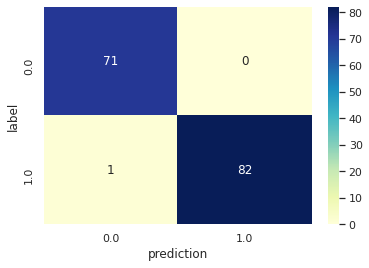

In [37]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train ROC curve

No handles with labels found to put in legend.


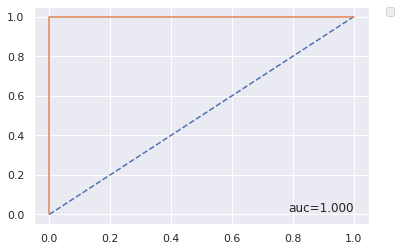

In [38]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

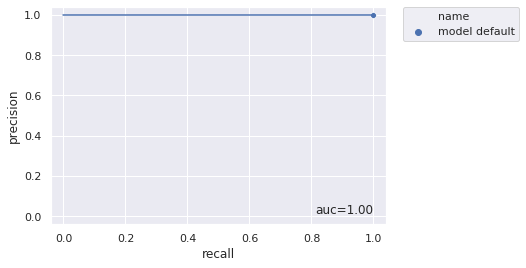

In [20]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Validation

In [44]:
results = get_results(model, validation)

In [45]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [46]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.6153846383094788
Loss: 4.125478744506836


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.513,8,12,8,11,0.421,0.600,0.500,0.522,0.400,0.579,0.500,0.511,0.503
1.000,0.513,12,8,11,8,0.600,0.421,0.522,0.500,0.579,0.400,0.478,0.511,0.503


## Validation confusion matrix

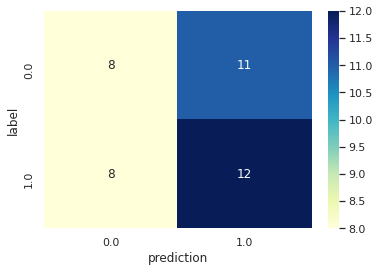

In [47]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation ROC curve

No handles with labels found to put in legend.


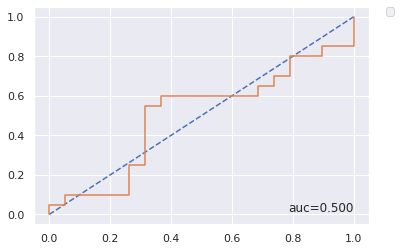

In [48]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

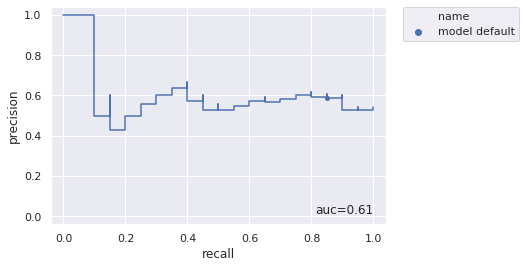

In [26]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Test

In [49]:
results = get_results(model, test)

In [50]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)
names = test.names
test_results = [['PatientID','True label','Predicted label','Probability']]
index = 0
for name in names:
    test_results.append([name, labels[index], predictions[index], probabilities[index]])
    index += 1
df = pandas.DataFrame(test_results)
df.to_csv("output/test_results/{}-{}.csv".format(UUID, result.model), header=False, index=False)
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

## Test statistics

In [51]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.5555555820465088
Loss: 4.632849216461182


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.556,8,7,7,5,0.615,0.500,0.533,0.583,0.500,0.385,0.467,0.558,0.555
1.000,0.556,7,8,5,7,0.500,0.615,0.583,0.533,0.385,0.500,0.417,0.558,0.555


## Test confusion matrix

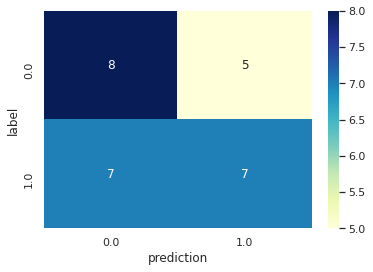

In [52]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test ROC curve

No handles with labels found to put in legend.


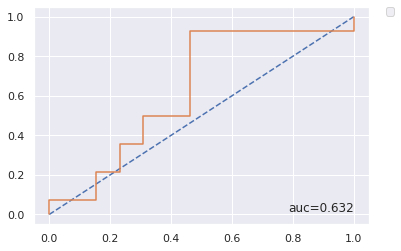

In [53]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

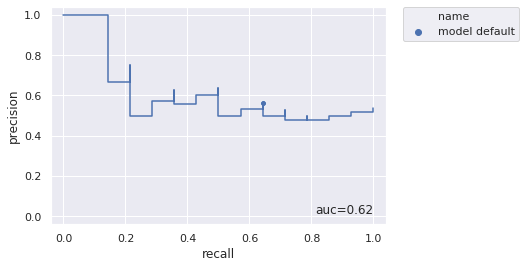

In [33]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

In [33]:
import json
hyperparameters = json.loads(result.hyperparameters)
deep_top = hyperparameters["deep-dense-top"]
grad_cam_layer = "dense_3"
if deep_top: 
    grad_cam_layer = "dense_6"

# TSNE

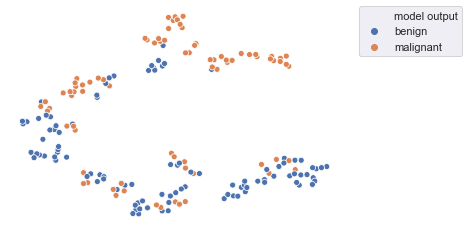

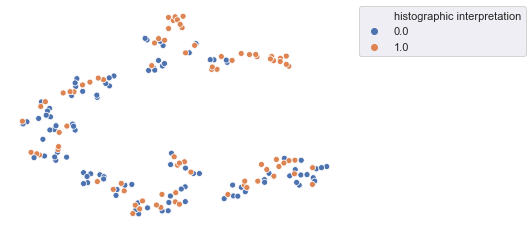

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-model-output-tsne.svg'

In [34]:
if result.input_form != "features": 
    layer = "dense_1"
    if deep_top: 
        layer = "dense_3"
    tsne_dataset = train
    tsne_dataset.reset()
    fieldnames = ["histographic interpretation"]
    tsne_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, tsne_dataset))]
    figs = plot_tsne(
        model, 
        layer, 
        tsne_dataset, 
        [tsne_results, tsne_dataset.labels], 
        fieldnames=["model output", *fieldnames], 
        perplexity=TSNE_PERPLEXITY,
    )
    for i, field in enumerate(["model output", *fieldnames]): 
        figs[i].savefig("figures/{}-{}-{}-tsne.svg".format(result.description, result.input_form, field.replace(" ", "-")), bbox_inches = "tight")
    tsne_dataset.reset()

# Grad Cam

In [ ]:
def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="res5c_branch2c", layer="dense_3", columns=2, include_label=True):
    filter_idx = [0]
    grad_modifier = None
    backprop_modifier = None
    penultimate_layer_idx = None
    if penultimate_layer:
        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
    rows = int(math.ceil(len(images) * 2/columns))
    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
    ax = ax.flatten()
    for i, image in enumerate(images): 
        grad = visualize_cam(
            model,
            find_layer_idx(model, layer),
            filter_idx,
            normalize(image),
            penultimate_layer_idx=penultimate_layer_idx,
            backprop_modifier=backprop_modifier,
            grad_modifier=grad_modifier)
        if names is not None: 
            ax[2*i].set_title("{}".format(names[i]))
        ax[2*i].imshow(image)
        ax[2*i].axis('off')
        if include_label: 
            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
        ax[2*i+1].imshow(overlay(grad, image))
        ax[2*i+1].axis('off')
    return f, ax

In [ ]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
if grad_cam_dataset.parameters["t1"]: 
    show_grad_cam_images(grad_cam_dataset.t1, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
    plt.show()
if grad_cam_dataset.parameters["t2"]: 
    show_grad_cam_images(grad_cam_dataset.t2, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, penultimate_layer="res5c_branch2c_t2", layer=grad_cam_layer)
    plt.show()

In [2]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
inv_indices = {v: k for k, v in grad_cam_dataset.class_indices.items()}

if SELECTIONS == None: 
    SELECTIONS = dict()

if grad_cam_dataset.parameters["t1"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t1
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])            
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, include_label=False, names=None, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])                
        fig.show()

if grad_cam_dataset.parameters["t2"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t2
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, names=None, penultimate_layer="res5c_branch2c_t2",include_label=False, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])        
        fig.show()

NameError: name 'test' is not defined

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')